# Utils

### Data Loading

In [3]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

### Numpy Functions

In [5]:
import numpy as np
from typing import List, Tuple, Dict

### Sklearn Inputs

In [7]:
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix

# Data Loading and Visualization

I got my dataset from <br>
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [10]:
diabetes_df = pd.read_csv('diabetes_prediction_dataset.csv')
display(diabetes_df)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [11]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [12]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


<Axes: >

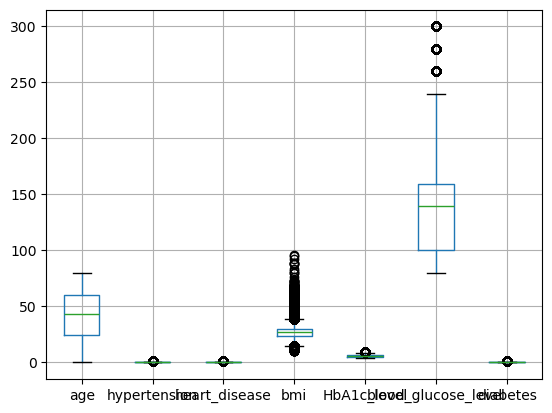

In [13]:
diabetes_df.boxplot()

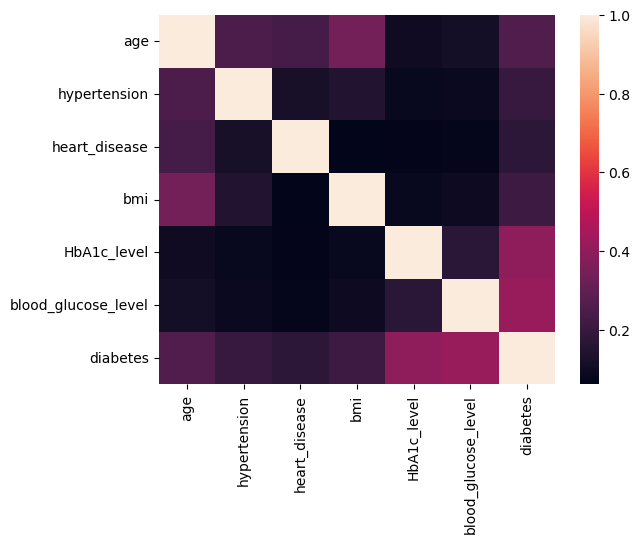

In [14]:
corr = diabetes_df.drop(columns=['gender', 'smoking_history']).corr()
plt.show(sbn.heatmap(corr))

# Data Pre-Processing and Cleaning

### Duplicated Rows

In [17]:
diabetes_df.duplicated().sum()

3854

In [18]:
diabetes_df.drop_duplicates(inplace=True)

In [19]:
diabetes_df.shape

(96146, 9)

### Convert Columns to Int

In [21]:
label_encoder = LabelEncoder()
change_columns = ['gender','smoking_history']
for column in change_columns:
    diabetes_df[column] = label_encoder.fit_transform(diabetes_df[column])
    diabetes_df[column] = diabetes_df[column].astype('int64')
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


In [22]:
display(diabetes_df)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


### Re-visualize Correlations

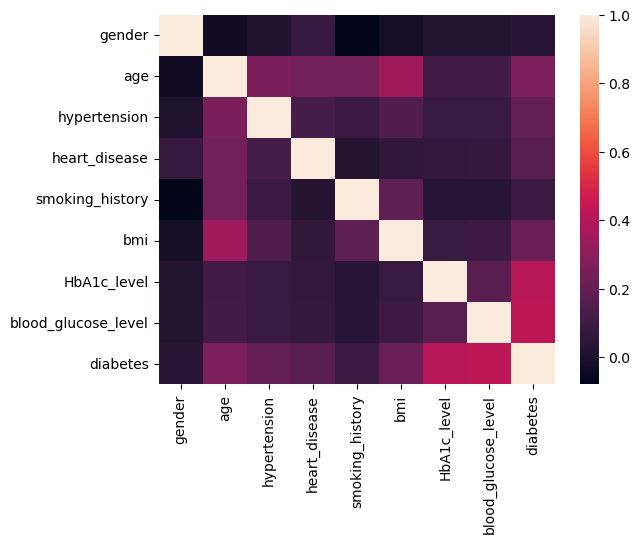

In [24]:
corr = diabetes_df.corr()
plt.show(sbn.heatmap(corr))

### Binarize Classes

In [26]:
def binarize_classes(X: np.ndarray, y: np.ndarray, pos_class: List[int], neg_class: List[int]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Function: Take positive and negative list and convert target into positive or negative label
    - X: input data
    - y: target data
    - pos_class: list of positive class labels
    - neg_class: list of negative class labels
    Returns: processed data converted into list containing positive and negative classes
    """
    X = X.copy()
    y = y.copy()
    # Find positive data indices and put them together
    pos_indices = np.where(np.isin(y, pos_class))
    X_pos, y_pos = X[pos_indices], np.ones(X[pos_indices].shape[0])
    # Find negative data indices and put them together
    neg_indices = np.where(np.isin(y, neg_class))
    X_neg, y_neg = X[neg_indices], -np.ones(X[neg_indices].shape[0])
    
    return np.vstack([X_pos, X_neg]), np.hstack([y_pos, y_neg])

### Pre-Process Functions

In [28]:
def add_bias(X: np.ndarray) -> np.ndarray:
    # create bias vector with same number of rows as X
    bias = np.ones((X.shape[0], 1))
    # combine bias by adding additional first row to the data
    combined = np.column_stack((bias,X))
    return combined

In [29]:
def get_preprocessed_preceptron_data():
    # seperate X and y data and convert to numpy
    X, y = binarize_classes(diabetes_df.drop(columns='diabetes').to_numpy(), diabetes_df['diabetes'].to_numpy(), [1], [0])
    # split into training and testing
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.7, random_state=42)
    # split into training and validation data
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=0.7, random_state=42)
    # Standardize Data
    scaler = StandardScaler()
    scaler.fit(X_trn)
    X_trn = scaler.transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)
    # Add Bias to X data
    X_trn, X_vld, X_tst = add_bias(X_trn), add_bias(X_vld), add_bias(X_tst)
    # Return and ensure targets are 2D
    return X_trn, y_trn.reshape(-1,1), X_vld, y_vld.reshape(-1,1), X_tst, y_tst.reshape(-1,1)

In [30]:
def get_preprocessed_logistic_data() -> Tuple[np.ndarray]:
    # OneHotCode due to softmax functionality
    encoder = OneHotEncoder(sparse_output=False)
    X = diabetes_df.drop(columns='diabetes').to_numpy()
    y = encoder.fit_transform(diabetes_df['diabetes'].to_numpy().reshape(-1,1))
    # split into training and testing
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.7, random_state=42)
    # split into training and validation data
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=0.7, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_trn)
    X_trn = scaler.transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    X_trn, X_vld, X_tst = add_bias(X_trn), add_bias(X_vld), add_bias(X_tst)
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

### Batching

In [32]:
def get_batches(data_len: int, batch_size: int = 30) -> List[np.ndarray]:
    # Generate indices
    indices = np.arange(data_len)
    # randomly shuffle the indices
    np.random.shuffle(indices)
    # create the batches randomly shuffled indices
    batches = []
    for i in range(0, data_len, batch_size):
        batches.append(indices[i:i + batch_size])
    return batches

# ML Models

### Perceptron

In [35]:
class Perceptron():
    """ 
    Function: Performs binary classification using Rosenblatt's perceptron
    - Alpha: learning rate to adjust weights
    - Epochs: Number of training intervals to run
    - Seed: Random state seed
    - self.w: weights used for predictions
    - self.trn_acc: list containing history of models accuracy using the training data
    - self.vld_acc: list containing history of models accuracy using the validation data
    """
    def __init__(self, alpha: float, seed: int = 0, epochs: int = 1,):
        self.alpha = alpha
        self.epochs = epochs
        self.seed = seed
        self.w = None
        self.trn_acc = None
        self.vld_acc = None
    """
    Function: Train the perceptron to find optimal weights
    - self: objects instance
    - X: input data to train
    - y: target data
    - X_vld: validation input data
    - y_vld: validation target data
    Returns: object reference
    """
    def fit(self, X: np.ndarray, y: np.ndarray, X_vld: np.ndarray=None, y_vld: np.ndarray=None) -> object:
        np.random.seed(self.seed) # Set seed for reproducibility
        self.trn_acc = []
        self.vld_acc = []
        # initialize weights to random values
        self.w = np.random.rand(X.shape[1])
        # run training over self.epochs total times
        for e in range(self.epochs):
            # reset misclassified value to 0, end training if misclassified remains 0
            misclassified = 0
            for m in range(len(X)):
                z = self.w @ X[m]
                y_hat = np.sign(z)
                if y_hat != y[m]:
                    misclassified = misclassified + 1
                    self.w = self.w + (self.alpha * (y[m] * X[m]))
            
            trn_preds = self.predict(X)
            trn_acc = acc(y, trn_preds)
            self.trn_acc.append(trn_acc)

            if X_vld is not None and y_vld is not None:
                vld_preds = self.predict(X_vld)
                vld_acc = acc(y_vld, vld_preds)
                self.vld_acc.append(vld_acc)
            if misclassified == 0:
                break
        return self 

    """
    Function: Make predictions using learned weights and input data X
    - self: object instance reference
    - X: input data
    Returns: prediction of labels
    """
    def predict(self, X: np.ndarray) -> np.ndarray:
        pred = np.sign(X @ self.w)
        return pred

### Logistic Regression (Using Softmax Regression with Batch Gradient Descent)

In [37]:
# Got this method of completing the softmax regression via hw-logistic-regression from ITCS-3156
"""
Function: Computes the stabilized version of the softmax equation
- z: matrix of continous values
Return: a numpy array with same shape as input
"""
def softmax(z: np.ndarray) -> np.ndarray:
    z_exp = z - np.max(z, axis=1, keepdims=True)
    e_z = np.exp(z_exp)
    sum_z = np.sum(e_z, axis=1, keepdims=True)
    return e_z / sum_z

In [38]:
# Got this method of completing the negative log likelihood loss via hw-logistic-regression from ITCS-3156
"""
Function: Computes the average generalized NLL Loss
- y: True labels
- probs: predicted probabilities for the corresponding labels
Returns: FLoat 
"""
def nll_loss(y: np.ndarray, probs: np.ndarray) -> float:
    nll = -np.sum(y * np.log(probs)) / len(y)
    return nll

In [39]:
class SoftmaxRegression():
    """ 
    Function: Performs softmax regression using gradient descent
    - alpha: learning rate
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    - epochs: Number of epochs to run for mini-batch gradient descent.
    - seed: Seed to be used for NumPy's RandomState class or universal seed np.random.seed() function.
    - W: Matrix of weights with shape (N, |K|) 
    - trn_loss: Stores the training loss for each epoch.
    - vld_loss: Stores the validation loss for each epoch.
    """
    def __init__(self, alpha: float, batch_size: int, epochs: int = 1, seed: int = 0,):
        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        self.W = None
        self.trn_loss = None
        self.vld_loss = None
    """
    Function: Train the softmax regression model using input data to form weights
    - X: Training features/data
    - y: Training labels
    - X_vld: Validation features/data
    - y_vld: Validation labels
    - seed: Seed used for initializing weights
    """
    def fit(self, X: np.ndarray, y: np.ndarray, X_vld: np.ndarray=None, y_vld: np.ndarray=None) -> object:
        # Set seed for reproducibility
        np.random.seed(self.seed)
        # Track training/validation loss
        self.trn_loss = []
        self.vld_loss = []

        # initiliaze random weight values
        self.W = np.random.rand(X.shape[1], y.shape[1])
        # run through self.epochs amount of training loops
        for e in range(self.epochs):
            # get batches for mini-batch gradient descent and update weights
            batches = get_batches(len(X), self.batch_size)
            for b in batches:
                z = X[b] @ self.W
                y_hat = softmax(z)
                self.W = self.W - self.alpha * ((X[b].T @ (y_hat - y[b])) / len(b))
            f_xw = softmax(X @ self.W)
            self.trn_loss.append(nll_loss(y, f_xw))
            if X_vld is not None and y_vld is not None:
                f_vld_xw = softmax(X_vld @ self.W)
                self.vld_loss.append(nll_loss(y_vld, f_vld_xw))
        return self

    """
    Function: Make predictions using learned weights
    - X: Testing data given as a 2D matrix
    Returns: A 2D column vector of predictions for each data sample in X
    """
    def predict(self, X: np.ndarray) -> np.ndarray:
        return (np.argmax(X @ self.W, axis=1, keepdims=True)).reshape(-1,1)

# Model Evaluation

### Evaluation Methods and Visualizations

In [42]:
# I got this way of plotting confusion matrix from HW assignments in my ITCS-3156 Course (HW assignment hw-perceptron)
"""
    Function: Plots a more readable and understandable version of Sklearns confusion matrix
    - y: actual labels from the dataset
    - y_hatL predicted labels from the algorithm
    - class_name_key: a dictionary where each key corresponds to a label in the y and y_hat data
    Returns: A confusion matrix casted as a DataFrame
    """
def plot_perceptron_confusion_matrix(y: np.ndarray, y_hat: np.ndarray, class_name_key: Dict[int, str] = None) -> pd.DataFrame:
    # reshape to make 1D vector for consistency
    y =  y.flatten() 
    # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() 
    #create default matrix
    cfm = confusion_matrix(y, y_hat)
    
    labels = np.sort(np.unique(y))
    if class_name_key is not None:
        classes = []
        for l in labels:
            class_name = class_name_key.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sbn.heatmap(cfm_df, annot=True)
    plt.show()
    return cfm_df

In [43]:
# I got this way of plotting via hw-logistic-regression from class ITCS-3156
"""
Function: Plots sklearns confusion matrix for a OneHotEncoder labeled target
y: true labels
y_hat: predicted labels
class_names: dictionary mapping labels to class names
Returns: Confusion matrix casted as a DataFrame
"""
def plot_logistic_confusion_matrix(y: np.ndarray, y_hat: np.ndarray, class_names: Dict[int, str] = None) -> pd.DataFrame:
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency
    
    cfm = confusion_matrix(y_true=y, y_pred=y_hat)    
    
    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sbn.heatmap(cfm_df, annot=True, fmt='g')
    plt.show()
    return cfm_df

In [44]:
# I got this method of doing this via hw-perceptron from my ITCS-3156 course
""" PPV = TP / (TP + FP)
Function: Compute the precision score
- y: true label
- y_hat: predicted label
Returns: Float indicating the precision score
"""
def ppv(y: np.ndarray, y_hat: np.ndarray) -> float:
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency
    
    cfm = confusion_matrix(y, y_hat)
    return cfm[1][1] / (cfm[1][1] + cfm[0][1])

In [45]:
# I got this method of using this evaluation via hw-perceptron from my ITCS-3156 course
""" TPR = TP / (TP + FN)
Function: Compute the recall score
- y: true label
- y_hat: predicted labels
Returns: Float indicating recall score
"""
def tpr(y: np.ndarray, y_hat: np.ndarray) -> float:
    cfm = confusion_matrix(y, y_hat)
    return cfm[1][1] / (cfm[1][1] + cfm[1][0])

In [46]:
# I got this method of using this evaluation via hw-perceptron from my ITCS-3156 course
""" TNR = TN / (TN + FP)
Function: Compute the Specificity score
- y: true label
- y_hat: predicted labels
Returns; Float indicating specificity score
"""
def tnr(y: np.ndarray, y_hat: np.ndarray) -> float:
    cfm = confusion_matrix(y, y_hat)
    return cfm[0][0] / (cfm[0][0] + cfm[0][1])

### Training, Validation and Testing Data For Perceptron

In [48]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_preceptron_data()
X_trn.shape, y_trn.shape, X_vld.shape, y_vld.shape, X_tst.shape, y_tst.shape

((47111, 9), (47111, 1), (20191, 9), (20191, 1), (28844, 9), (28844, 1))

### Evaluate Perceptron

In [50]:
perceptron = Perceptron(alpha=.00001, seed=42, epochs=50)
perceptron.fit(X_trn, y_trn, X_vld, y_vld)
pred_trn = perceptron.predict(X_trn)
pred_vld = perceptron.predict(X_vld)
pred_tst = perceptron.predict(X_tst)

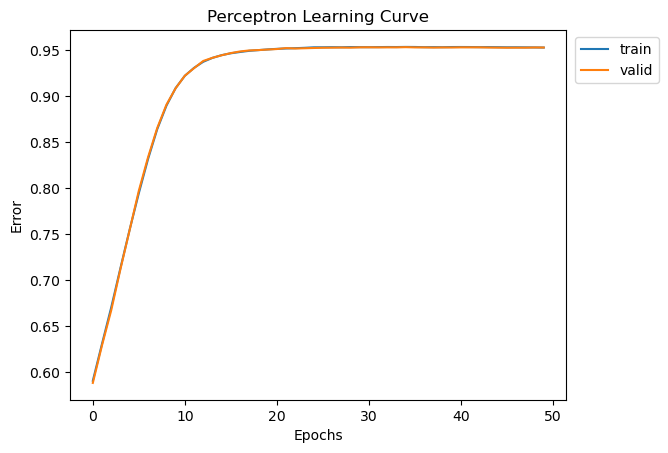

In [51]:
plt.plot(perceptron.trn_acc, label='train')
plt.plot(perceptron.vld_acc, label='valid')
plt.title("Perceptron Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(bbox_to_anchor=(1.2, 1.00))
plt.show()

In [52]:
print('Train Acc: %.3f' % acc(y_trn, pred_trn))
print('Validation Acc: %.3f' % acc(y_vld, pred_vld))
print('Test Acc: %.3f' % acc(y_tst, pred_tst))
print('----------------------')
print('Test TPR: % .3f' % tpr(y_tst, pred_tst))
print('Test TNR: % .3f' % tnr(y_tst, pred_tst))
print('Test PPV: % .3f' % ppv(y_tst, pred_tst))

Train Acc: 0.953
Validation Acc: 0.953
Test Acc: 0.954
----------------------
Test TPR:  0.685
Test TNR:  0.979
Test PPV:  0.760


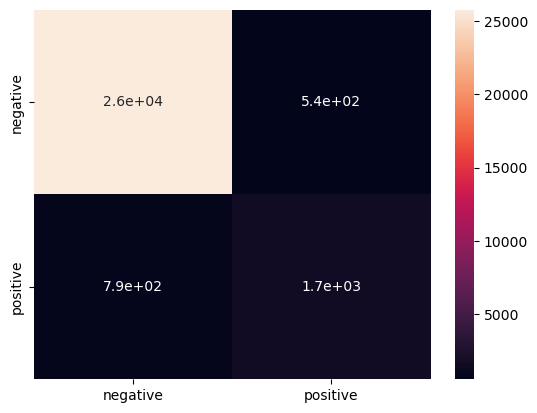

In [53]:
# Plot the confusion matrix of the test data
plot_perceptron_confusion_matrix(y_tst, pred_tst, {1: 'positive', -1: 'negative'});

### Training, Validation, Testing Data For Logistic Regression

In [55]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_logistic_data()
X_trn.shape, y_trn.shape, X_vld.shape, y_vld.shape, X_tst.shape, y_tst.shape

((47111, 9), (47111, 2), (20191, 9), (20191, 2), (28844, 9), (28844, 2))

### Evaluate Logistic Regression

In [57]:
softmax_regression_model = SoftmaxRegression(alpha=.0001, batch_size=20, epochs=200, seed=42)
softmax_regression_model.fit(X_trn, y_trn, X_vld, y_vld)
trn_pred = softmax_regression_model.predict(X_trn)
vld_pred = softmax_regression_model.predict(X_vld)
tst_pred = softmax_regression_model.predict(X_tst)

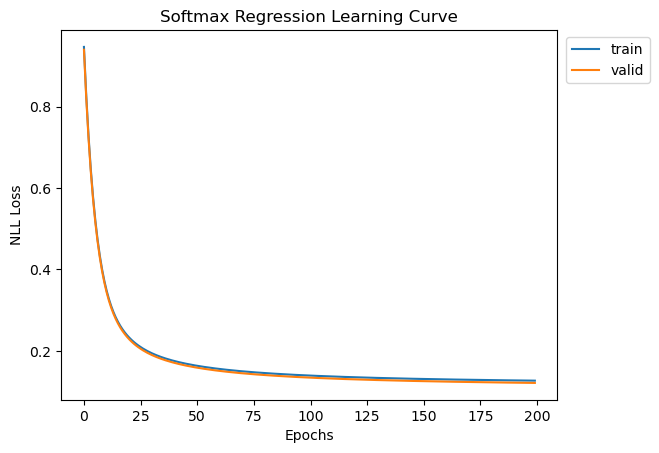

In [58]:
plt.plot(softmax_regression_model.trn_loss, label='train')
plt.plot(softmax_regression_model.vld_loss, label='valid')
plt.title("Softmax Regression Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("NLL Loss")
plt.legend(bbox_to_anchor=(1.2, 1.00))
plt.show()

In [59]:
trn_acc = acc(np.argmax(y_trn, axis=1), trn_pred)
print('Training Accuracy: %.5f' % trn_acc)
vld_acc = acc(np.argmax(y_vld, axis=1), vld_pred)
print('Validation Accuracy: %.5f' % vld_acc)
tst_acc = acc(np.argmax(y_tst, axis=1), tst_pred)
print('Testing Accuracy: %.5f' % tst_acc)
print('-----------------------------------------')
print('Test TPR: % .3f' % tpr(np.argmax(y_tst, axis=1), tst_pred))
print('Test TNR: % .3f' % tnr(np.argmax(y_tst, axis=1), tst_pred))
print('Test PPV: % .3f' % ppv(np.argmax(y_tst, axis=1), tst_pred))

Training Accuracy: 0.95708
Validation Accuracy: 0.96048
Testing Accuracy: 0.95760
-----------------------------------------
Test TPR:  0.593
Test TNR:  0.993
Test PPV:  0.897


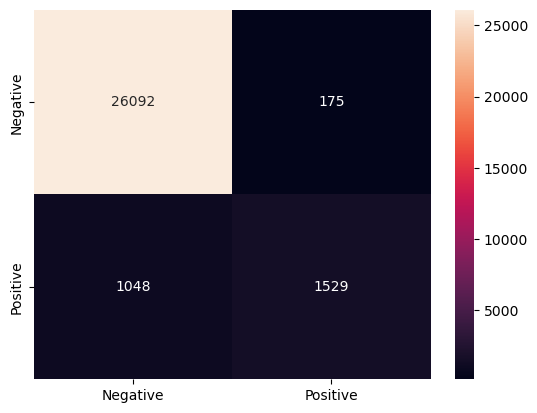

In [60]:
plot_logistic_confusion_matrix(np.argmax(y_tst, axis=1), tst_pred, {0: 'Negative', 1: 'Positive'});